<a href="https://colab.research.google.com/github/Abhishekydv03/AI-/blob/main/Regularised%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def sigmoid(z):
  return 1/(1+np.exp(-z))

def regularised_logistic_regression(x,y, learning_rate=0.01, iteration=1000,lambda_reg=0.1):
  m,n = x.shape
  x = np.c_[ np.ones((m,1)),x]
  theta =np.zeros((n + 1,1))
  y = y.reshape(-1, 1) # Ensure y is a column vector

  cost_history = []

  for i in range(iteration):
    z= x.dot(theta)
    prediction = sigmoid(z)

    cost = (-1/m)*np.sum(
      y * np.log(prediction + 1e-8) + (1 - y) * np.log(1 - prediction + 1e-8)
    )
    reg_term =(lambda_reg /(2*m)) *np.sum(theta[1:] ** 2)
    total_cost =cost + reg_term
    cost_history.append(total_cost)

    gradient =(1 /m) *x.T.dot(prediction - y)
    gradient[1:] += (lambda_reg / m) * theta[1:]
    theta -= learning_rate* gradient

  return theta, cost_history

In [ ]:
np.random.seed(20)
x=np.random.randn(100,2)
y=(x[:,0]+ x[:,1]>0).astype(int)
theta, cost_history = regularised_logistic_regression(x,y,learning_rate=0.01,iteration=1000,lambda_reg=0.1)

print("parameter(theta):")
print(theta)

parameter(theta):
[[0.15734962]
 [1.28665431]
 [1.41990784]]


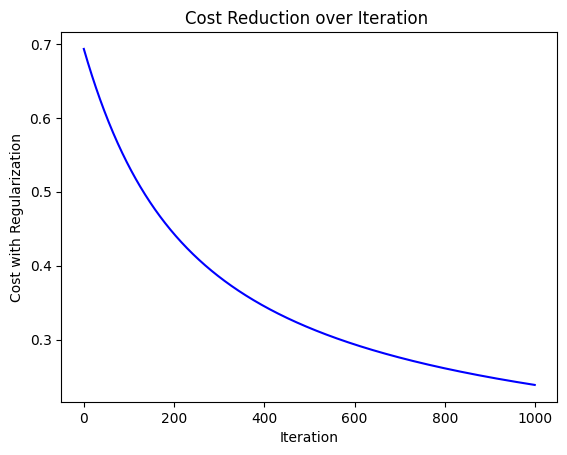

In [ ]:
plt.plot(range(len(cost_history)), cost_history,'-b')
plt.xlabel("Iteration")
plt.ylabel("Cost with Regularization")
plt.title("Cost Reduction over Iteration ")
plt.show()

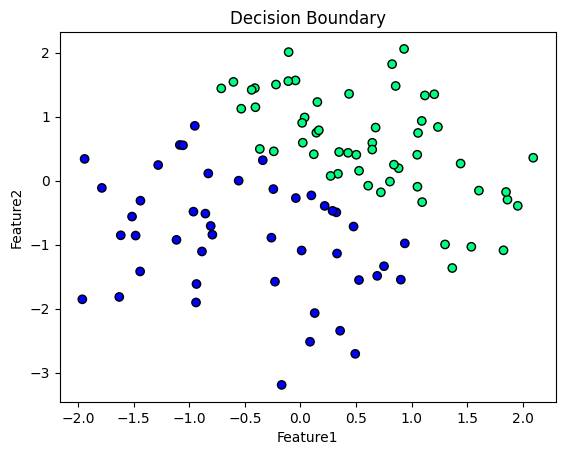

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter', edgecolors='k')
x_value=np.array(x[:,0].min(),x[:,0].max())
y_value=-(theta[0]+theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value,'-r')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Decision Boundary")
plt.show()
